In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
local_crs = 32636
example_data_path = ".."

from blocksnet.models import City

/home/vasilstar/masterplanning/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


from blocksnet.models import City
city_model = City.from_pickle(os.path.join(example_data_path, 'city_model.pickle'))

In [2]:
city_model = City.from_pickle(os.path.join(example_data_path, 'model_0_0_6.pickle'))

In [3]:
from blocksnet.method import Connectivity
connectivity = Connectivity(city_model=city_model).calculate()
connectivity.head()

,geometry,connectivity
id,,
0,"POLYGON ((355583.354 6648333.072, 355583.354 6...",52.3
1,"POLYGON ((355912.941 6648259.548, 355903.080 6...",53.6
2,"POLYGON ((349119.898 6656201.093, 349137.911 6...",63.8
3,"POLYGON ((357191.408 6652330.197, 357174.126 6...",63.0
4,"POLYGON ((357164.118 6652238.080, 357166.290 6...",69.0


In [4]:
from blocksnet.method.diversity import Diversity
diversity = Diversity(city_model=city_model).calculate()
diversity.head()

,geometry,diversity
id,,
0,"POLYGON ((355583.354 6648333.072, 355583.354 6...",2.086670
1,"POLYGON ((355912.941 6648259.548, 355903.080 6...",1.332179
2,"POLYGON ((349119.898 6656201.093, 349137.911 6...",1.386294
3,"POLYGON ((357191.408 6652330.197, 357174.126 6...",1.641689
4,"POLYGON ((357164.118 6652238.080, 357166.290 6...",NaN


In [7]:
from blocksnet.method.centrality import Centrality
centrality = Centrality(city_model=city_model).calculate()
centrality.head()

,geometry,connectivity,density,diversity,centrality
id,,,,,
0,"POLYGON ((355583.354 6648333.072, 355583.354 6...",52.3,0.000178,2.086670,0.309282
1,"POLYGON ((355912.941 6648259.548, 355903.080 6...",53.6,0.000058,1.332179,0.207151
2,"POLYGON ((349119.898 6656201.093, 349137.911 6...",63.8,0.000035,1.386294,0.243304
3,"POLYGON ((357191.408 6652330.197, 357174.126 6...",63.0,0.000082,1.641689,0.277589
4,"POLYGON ((357164.118 6652238.080, 357166.290 6...",69.0,NaN,NaN,NaN


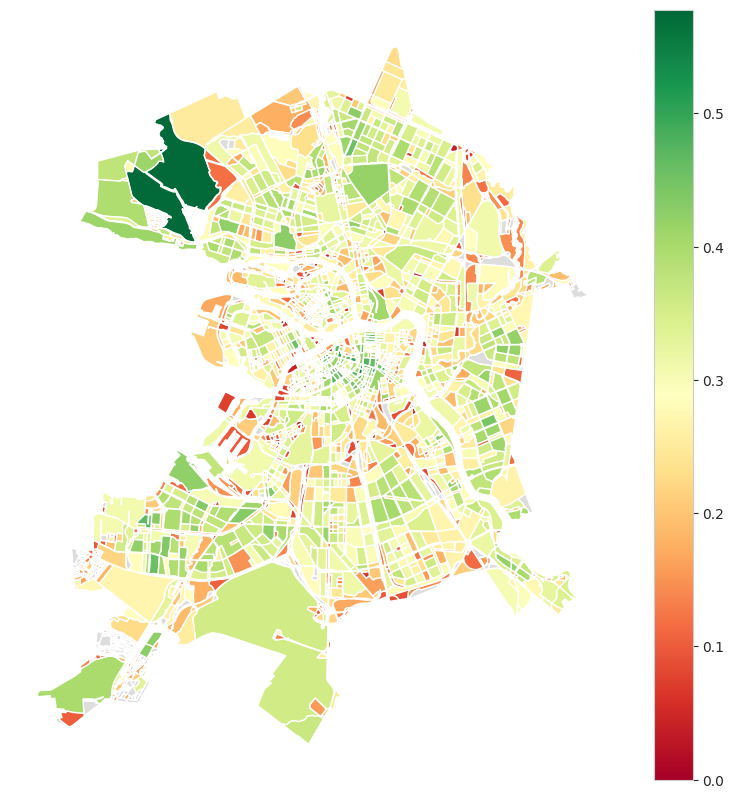

In [8]:
Centrality.plot(centrality)